# Visualizing Data with Python
#### February 20, 2021
IBM. (n.d.). Visualizing Data with Python. https://learning.edx.org/course/course-v1:IBM+DV0101EN+3T2020/home

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import date
footer = "Plot generated on " + date.today().strftime("%B %d, %Y")

### Data Collection and Preparation

In [2]:
xlsx_url = "/Users/Chrisdon/Documents/Training/Python/data/Canada.xlsx" 
xlsx_sheet = 'Canada by Citizenship'

import os
#import os.path

if os.path.isfile(xlsx_url) and os.access(xlsx_url, os.R_OK):
    pass
else:
    # Download and import the Canadian Immigration dataset using pandas read_excel() method.
    xlsx_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'

df_canada = pd.read_excel(xlsx_url,sheet_name=xlsx_sheet,skiprows=range(20),skipfooter=2)

An immigration dataframe was prepared for exploratory data analysis as follows:
1. Remove unnecessary columns using the drop() method.
2. Rename the columns using the rename() method 
3. Add a column containing the total number of immigrants by country for all time periods.
4. Replace the index sequence numbers with the country names to facilitate easy country lookup operations.
5. Convert the year column names from integers to strings

In [3]:
# Prepare the dataframe to facilitate visualizations.  
df_canada.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_canada['Total'] = df_canada.sum(axis=1)
df_canada.set_index('Country', inplace=True)
df_canada.columns = list(map(str, df_canada.columns))
df_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [4]:
# Create a dataframe that stores the top 5 countries that represent the highest number of immigrants into Canada.
df_canada.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_top5 = df_canada.head(5)
years = list(map(str, range(1980, 2014))) # Convert the year values from integer to string.
df_top5 = df_top5[years].transpose()
df_top5 = df_top5.rename(columns={'United Kingdom of Great Britain and Northern Ireland': 'UK'})

### Data Visualizations

In [5]:
# Convert the year index to integers.
df_top5.index = df_top5.index.map(int)
df_top5.loc[[2009,2010,2011,2012,2013],:]

Country,India,China,UK,Philippines,Pakistan
2009,29456,29622,8876,28573,7217
2010,34235,30391,8724,38617,6811
2011,27509,28502,6204,36765,7468
2012,30933,33024,6195,34315,11227
2013,33087,34129,5827,29544,12603


#### Line Plots
Line plots display information for continuous data sets and are ideal for analyzing immigration trends or changes between 1980 and 2013.

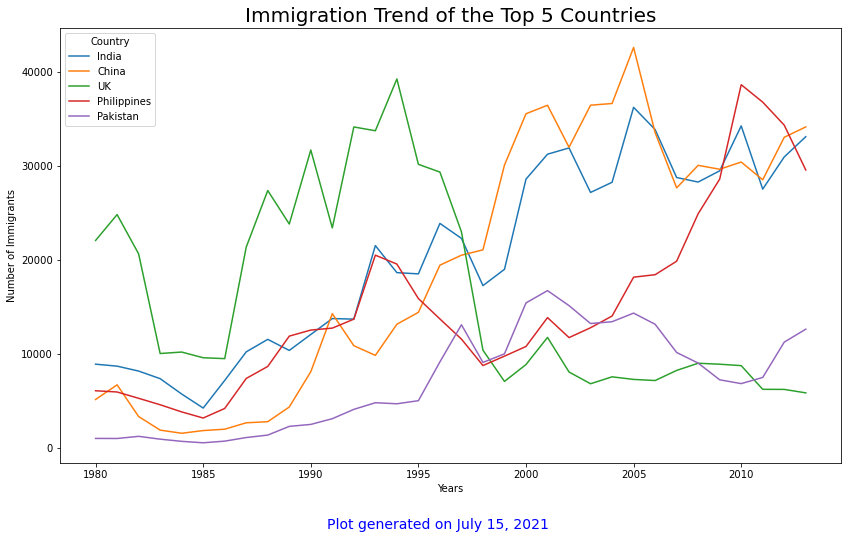

In [6]:
# Generate the line chart.
df_top5.plot(kind='line', figsize=(14, 8),)
plt.title('Immigration Trend of the Top 5 Countries', fontsize= 20)
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.figtext(0.5, 0.01, footer, wrap=True, horizontalalignment='center', fontsize=14, color='blue')
plt.show()

#### Area Plots
Area plots are similar to line charts and show how the number of immigrants from each country has changed over time.

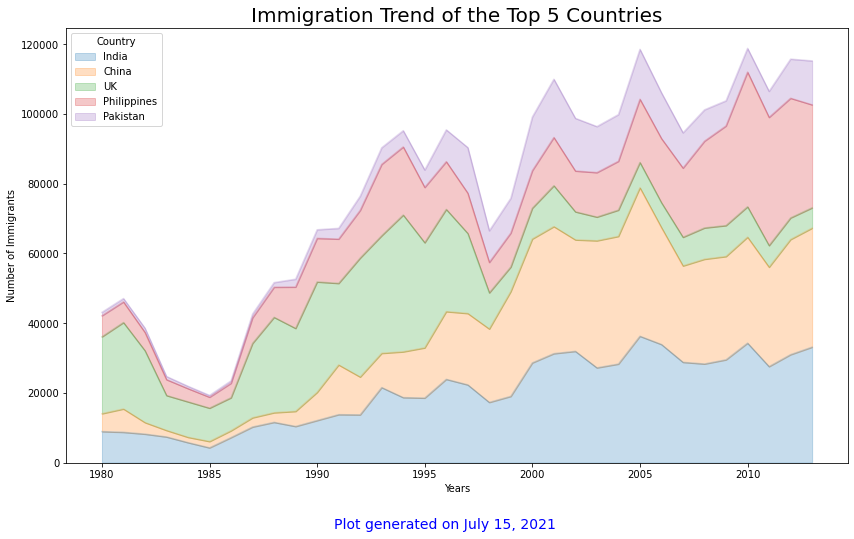

In [7]:
# Generate the staked area chart.
df_top5.plot(kind='area',alpha=0.25,stacked=True,figsize=(14, 8))
plt.title('Immigration Trend of the Top 5 Countries', fontsize= 20)
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.figtext(0.5, 0.01, footer, wrap=True, horizontalalignment='center', fontsize=14, color='blue')
plt.show()

#### Histograms
Histograms show the frequency distribution of numeric data. Histograms partitions the x-axis into bins, assigns each data point to a bin and counts the number of data points in each bin. The y-axis represents the frequency of data points in each bin. This chart is useful for visualizing the frequency distribution of immigrants from the top 5 countries. 

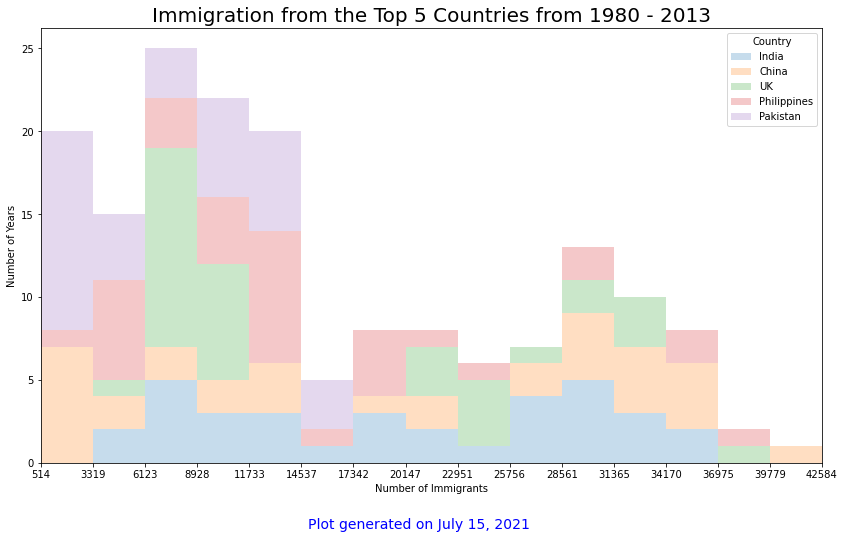

In [8]:
# Get the tick values for the x-axis
count, bin_edges = np.histogram(df_top5, 15)
#  Increase the bin size using a buffer of 10 for aesthetics.
xmin = bin_edges[0] - 10   
xmax = bin_edges[-1] + 10
# Generate the stacked historam chart.
df_top5.plot(kind='hist',figsize=(14, 8),bins=15,alpha=0.25,xticks=bin_edges,stacked=True,xlim=(xmin, xmax))
plt.title('Immigration from the Top 5 Countries from 1980 - 2013', fontsize=20)
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.figtext(0.5, 0.01, footer, wrap=True, horizontalalignment='center', fontsize=14, color='blue')
plt.show()

#### Bar Charts

Bar plot show numerical (number of immigrants) and categorical variables(country) grouped in intervals (year). The length of the bars represents the magnitude of the variable.

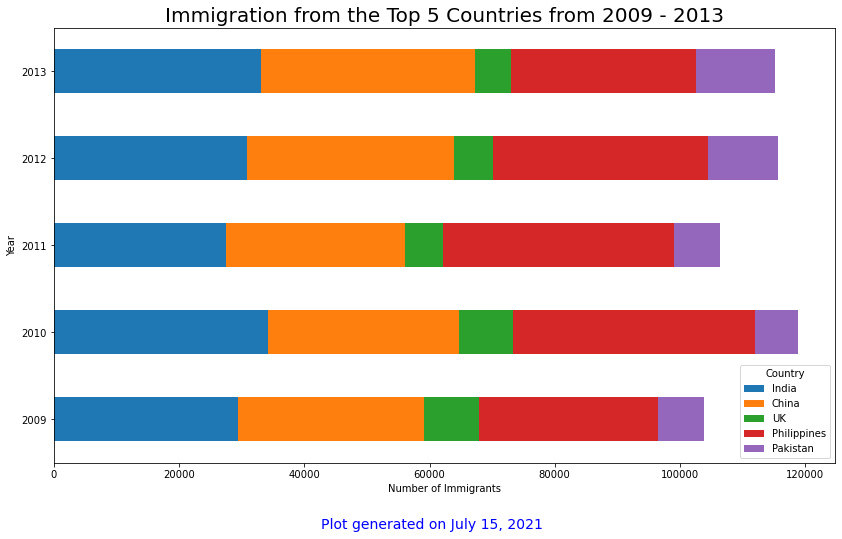

In [9]:
# Plot the number of immigrants from each top 5 country for the past 5 years
df_top5.loc[[2009,2010,2011,2012,2013],:].plot(kind='barh', figsize=(14, 8), stacked=True)
plt.title('Immigration from the Top 5 Countries from 2009 - 2013', fontsize=20)
plt.xlabel('Number of Immigrants')
plt.ylabel('Year')
plt.figtext(0.5, 0.01, footer, wrap=True, horizontalalignment='center', fontsize=14, color='blue')
plt.show()

#### Pie Charts
Pie charts help visualize the composition or numeric proportion of data by dividing a circle into proportional wedges that show the relative size of different data grouping.

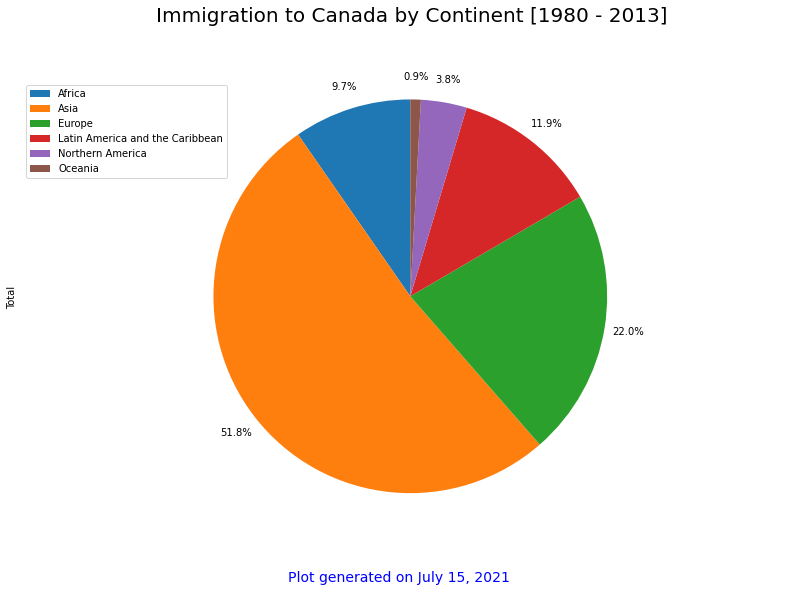

In [10]:
# Aggregate the number of immigrants by continent and store the data in a new dataframe. 
df_continents = df_canada.groupby('Continent', axis=0).sum()
# Plot the pie chart.
df_continents['Total'].plot(kind='pie',figsize=(14, 8),autopct='%1.1f%%', startangle=90,labels=None,pctdistance=1.12,)
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12, fontsize=20) 
plt.axis('equal') 
plt.legend(labels=df_continents.index, loc='upper left')
plt.figtext(0.5, 0.01, footer, wrap=True, horizontalalignment='center', fontsize=14, color='blue')
plt.show()

#### Box Plot

Boxplots are useful for statistically describing the distribution or variation in the data through quartiles.

In [11]:
df_canada.groupby('Continent', axis=0).sum()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


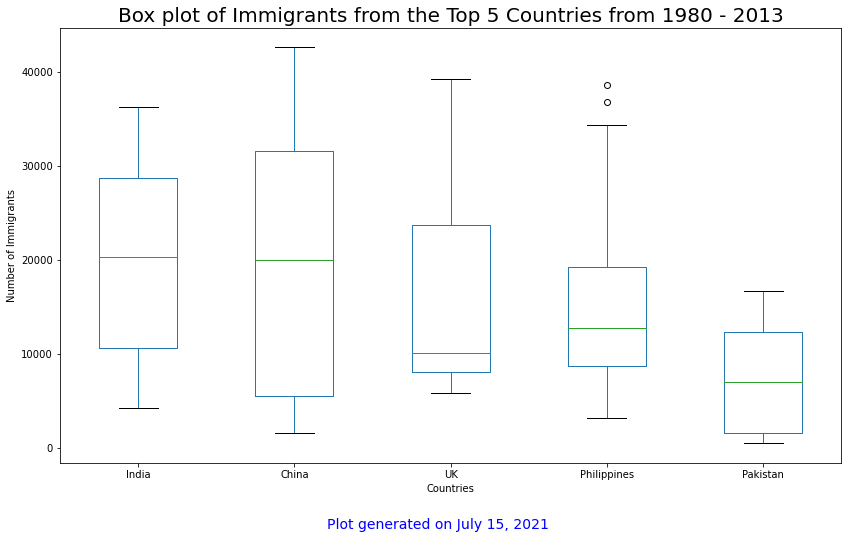

In [12]:
df_top5.plot(kind='box', figsize=(14, 8))
plt.title('Box plot of Immigrants from the Top 5 Countries from 1980 - 2013', fontsize=20)
plt.ylabel('Number of Immigrants')
plt.xlabel('Countries')
plt.figtext(0.5, 0.01, footer, wrap=True, horizontalalignment='center', fontsize=14, color='blue')
plt.show()

####  Scatter Plot
Scatter plots are useful for determining whether a correlation between the independent and dependent variables exists.

In [13]:
# Create a new dataframe containing the total number of immigrants for each year.  
df_tot = pd.DataFrame(df_canada[years].sum(axis=0))
df_tot.index = map(int, df_tot.index)
df_tot.reset_index(inplace = True)
df_tot.columns = ['year', 'total']

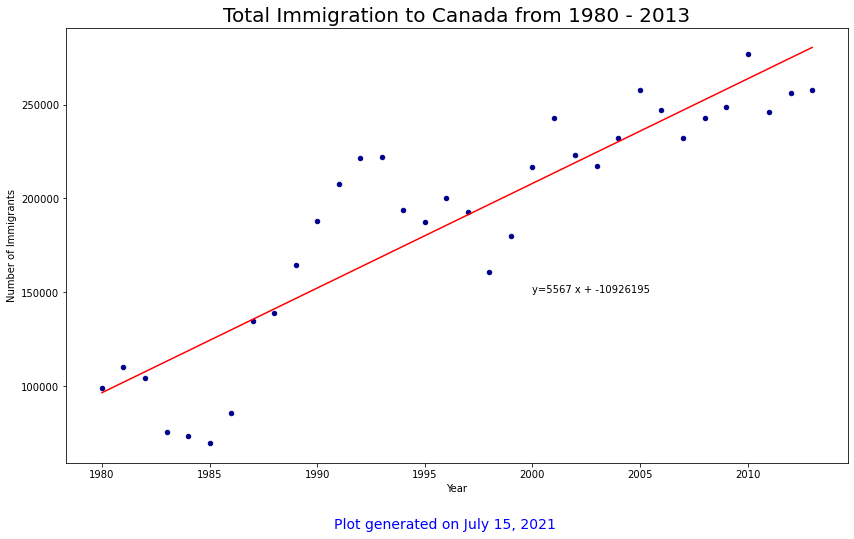

In [14]:
fit = np.polyfit(df_tot['year'], df_tot['total'], deg=1) # Calculate a least squares polynomial fit.
df_tot.plot(kind='scatter', x='year', y='total', figsize=(14, 8), color='darkblue')
plt.title('Total Immigration to Canada from 1980 - 2013', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
# plot line of best fit
plt.plot(df_tot['year'], fit[0] * df_tot['year'] + fit[1], color='red')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))
plt.figtext(0.5, 0.01, footer, wrap=True, horizontalalignment='center', fontsize=14, color='blue')
plt.show()

#### Bubble Chart
The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. The larger the bubble, the more immigrants in that year. The first step is to calculate the normalized weights of the population for each year using the feature scaling method to bring all the values into the range 0 to 1.

In [15]:
df_continents_t = df_continents[years].transpose()
df_continents_t.index = map(int, df_continents_t.index)
df_continents_t.index.name = 'Year'
df_continents_t.reset_index(inplace=True)
df_norm = (df_continents_t - df_continents_t.min()) / (df_continents_t.max() - df_continents_t.min())

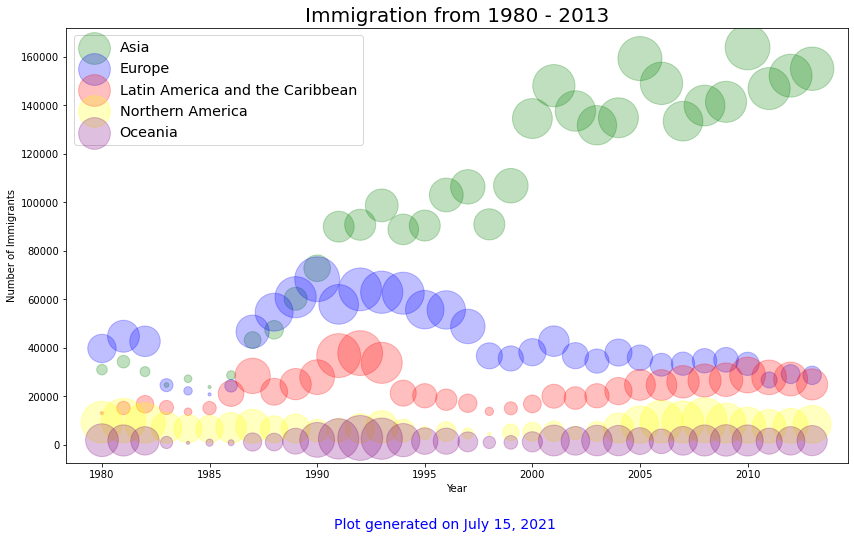

In [16]:
colors = ['green','blue','red','yellow','purple','cyan','fuchsia']
continents = list(df_continents_t.columns)[2:] # Extract the list of continents from the dataframe.
fig, ax = plt.subplots()
# Plot the bubbles for each continent.
for index, elem in enumerate(continents):
   ax =df_continents_t.plot(kind='scatter',x='Year',y=elem,alpha=0.25,figsize=(14, 8),
                  color=colors[index],s=df_norm[elem] * 2000 + 10,ax = ax)
ax.set_ylabel('Number of Immigrants')
ax.set_title('Immigration from 1980 - 2013', fontsize=20)
ax.legend(continents, loc='upper left', fontsize='x-large')
plt.figtext(0.5, 0.01, footer, wrap=True, horizontalalignment='center', fontsize=14, color='blue')
plt.show()

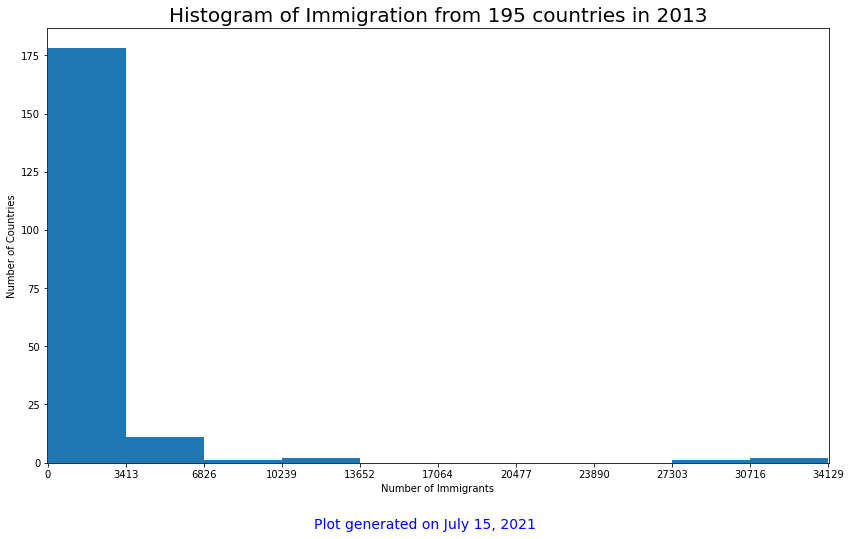

array([    0. ,  3412.9,  6825.8, 10238.7, 13651.6, 17064.5, 20477.4,
       23890.3, 27303.2, 30716.1, 34129. ])

In [17]:
# Get the tick values for the x-axis
count, bin_edges = np.histogram(df_canada['2013'])
#  Increase the bin size using a buffer of 10 for aesthetics.
xmin = bin_edges[0] - 10   
xmax = bin_edges[-1] + 10
df_canada['2013'].plot(kind='hist', figsize=(14, 8), xticks=bin_edges,xlim=(xmin, xmax))
plt.title('Histogram of Immigration from 195 countries in 2013',fontsize=20)
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label
plt.figtext(0.5, 0.01, footer, wrap=True, horizontalalignment='center', fontsize=14, color='blue')
plt.show()
count
bin_edges

<AxesSubplot:ylabel='Frequency'>

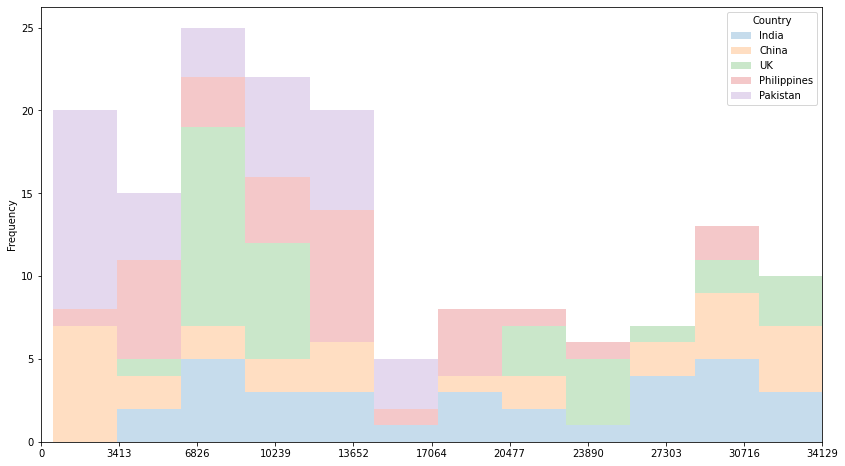

In [18]:
#  Increase the bin size using a buffer of 10 for aesthetics.
xmin = bin_edges[0] - 10   
xmax = bin_edges[-1] + 10
# Generate the stacked historam chart.
df_top5.plot(kind='hist',figsize=(14, 8),bins=15,alpha=0.25,xticks=bin_edges,stacked=True,xlim=(xmin, xmax))

In [19]:
bin_edges

array([    0. ,  3412.9,  6825.8, 10238.7, 13651.6, 17064.5, 20477.4,
       23890.3, 27303.2, 30716.1, 34129. ])